<a href="https://colab.research.google.com/github/SamyarZamani/ml-student-success-predictor/blob/main/ml_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# loading dataset

In [2]:
file_path = 'data.csv'

try:
    df = pd.read_csv('data.csv', sep=';')
except Exception as e:
    print("Error loading file:", e)

# get some information

In [3]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.columns)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

# preprpcessing

In [4]:
df = df.dropna()

In [5]:
print(df['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [6]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [7]:
X = df.drop('Target', axis=1)
y = df['Target']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model train

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# prediction part

In [11]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[244  21  51]
 [ 36  44  71]
 [  9  25 384]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       316
           1       0.49      0.29      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



# feature Importances

/tmp/ipython-input-14-1905315131.py:6: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


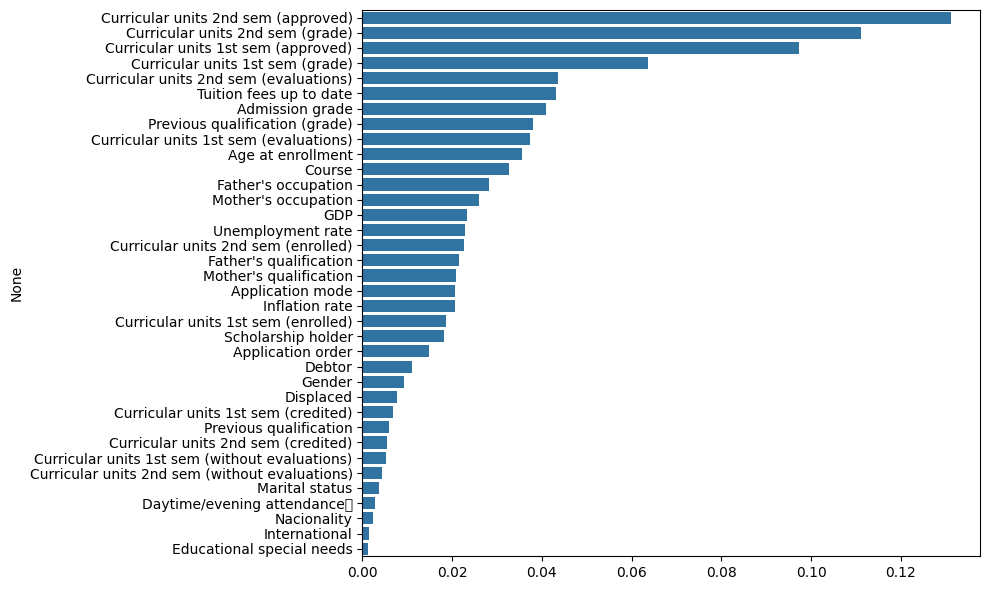

In [14]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.tight_layout()
plt.show()